In [42]:
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d

<IPython.core.display.Javascript object>


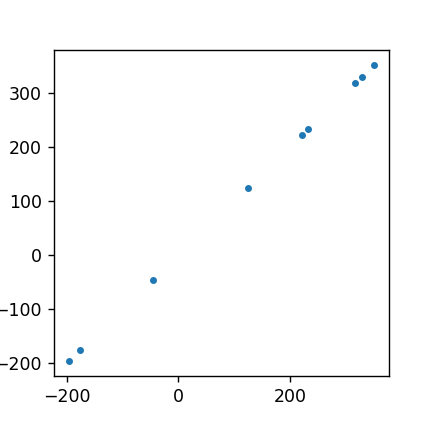

In [45]:
with open("data.npy", 'rb') as f:
    calib_data = np.load(f)
screen_width = 1920
screen_height = 1080

calib_data.shape
%matplotlib notebook
plt.plot(calib_data[:,0], calib_data[:,0],'.')
plt.show()

In [44]:
rects_pos = np.array([(20, 20), (940, 20), (1880, 20),
             (20, 520), (940, 520), (1880, 520),
             (20, 1040), (940, 1040), (1880, 1040)])
labels_x = calib_data[:,0]
labels_y = calib_data[:,1]

In [32]:
x_f = interp2d(rects_pos[:,0],rects_pos[:,1],labels_x)
y_f = interp2d(rects_pos[:,0],rects_pos[:,1],labels_y)

In [33]:
calib_data


array([[ 351,  237],
       [ 124,  166],
       [-196,  183],
       [ 233,  -49],
       [ 221,  -68],
       [-176,  -54],
       [ 317, -198],
       [ 329, -270],
       [ -46, -290]])

In [36]:
x = []
y = []
for i in range(9):
    val_x = x_f(rects_pos[i,0],rects_pos[i,1])
    x.append(val_x)
    val_y = y_f(rects_pos[i,0],rects_pos[i,1])
    y.append(val_y)
x = np.array(x).reshape(9)
y = np.array(y).reshape(9)


<IPython.core.display.Javascript object>


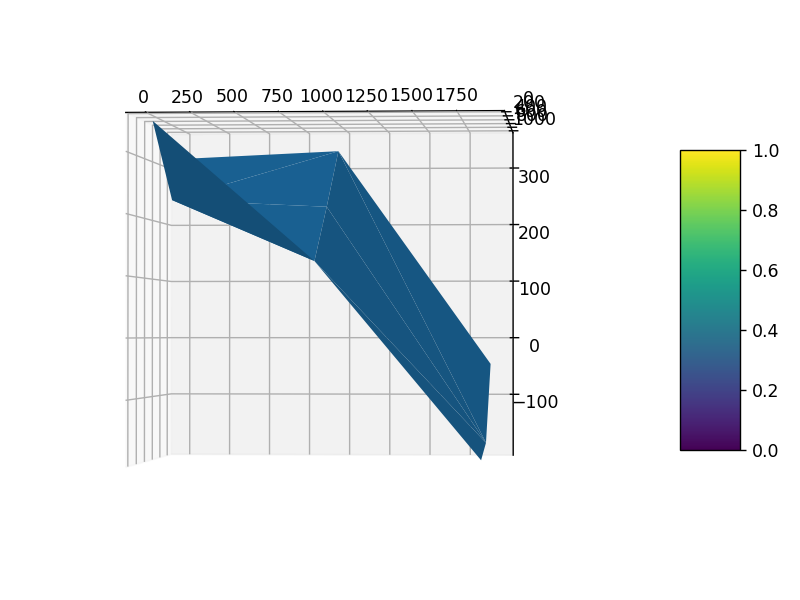

In [47]:
%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(rects_pos[:,0],rects_pos[:,1] , x, linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

<IPython.core.display.Javascript object>


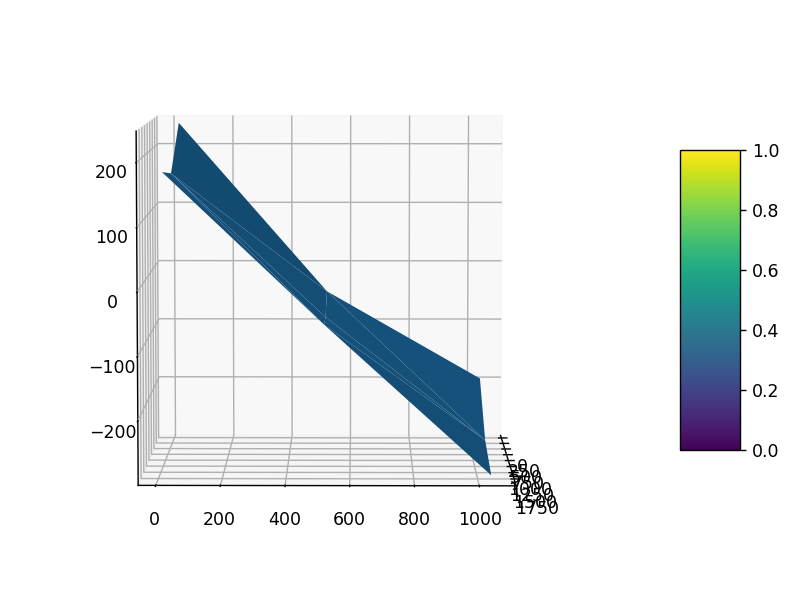

In [57]:
%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(rects_pos[:,0],rects_pos[:,1] , y, linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [58]:
def undistort(x,y):
    return x-x_f(x,y), y-y_f(x,y)

In [60]:
undistort(10,10)

(array([-341.]), array([-227.]))